In [11]:
# Add libraries here
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [12]:
#create variables to debug code
STEP1_DEBUG = 0
STEP2_DEBUG = 0
STEP3_DEBUG = 0
STEP4_DEBUG = 0
STEP5_DEBUG = 0
STEP6_DEBUG = 1
STEP7_DEBUG = 1
STEP8_DEBUG = 0

In [13]:
# -------------------------------
# Step 1 (may need to change relative location of csv file)
# -------------------------------

Labeled_Data = np.genfromtxt("../data/labeled_data.csv", delimiter=',')
if STEP1_DEBUG:
    print( Labeled_Data)


OSError: ../data/labeled_data.csv not found.

In [14]:
# -------------------------------
# Step 2
# -------------------------------

L0_idx=Labeled_Data[:,2]==0
L1_idx=Labeled_Data[:,2]==1

L0=Labeled_Data[L0_idx,0:2]
L1=Labeled_Data[L1_idx,0:2]

NameError: name 'Labeled_Data' is not defined

NameError: name 'L0' is not defined

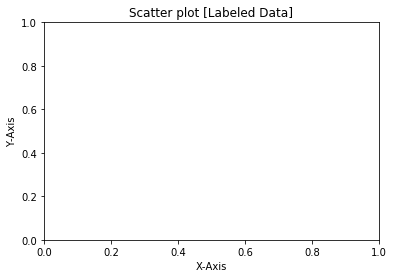

In [15]:
# -------------------------------
# Step 3
# -------------------------------

plt.figure()
plt.title( "Scatter plot [Labeled Data]")
plt.xlabel( "X-Axis" )
plt.ylabel( "Y-Axis" )
plt.scatter( L0[:,0], L0[:,1], color='red', marker='o', label="label 0")
plt.scatter( L1[:,0], L1[:,1], color='blue', marker='o', label="label 1")
plt.legend()
plt.show()

In [16]:
X=Labeled_Data[:,0:2]
Y=Labeled_Data[:,2]

clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


print( clf.intercept_[0] )

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter( L0[:,0], L0[:,1], color='red', marker='o', label="label 0")
plt.scatter( L1[:,0], L1[:,1], color='blue', marker='o', label="label 1")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], marker='o',
                facecolors='none', edgecolors='black')
plt.show()

NameError: name 'Labeled_Data' is not defined

In [17]:
Yhat=clf.predict( X )

yhat = np.zeros( ( 1, np.size(Y,0) ) )

for i in range( 0, np.size(Y,0) ):
    if ( np.matmul( np.transpose(w), X[i,:] ) + clf.intercept_ ) > 0:
        yhat[0,i] = 1

print( yhat[0] )
print( Yhat )

NameError: name 'clf' is not defined